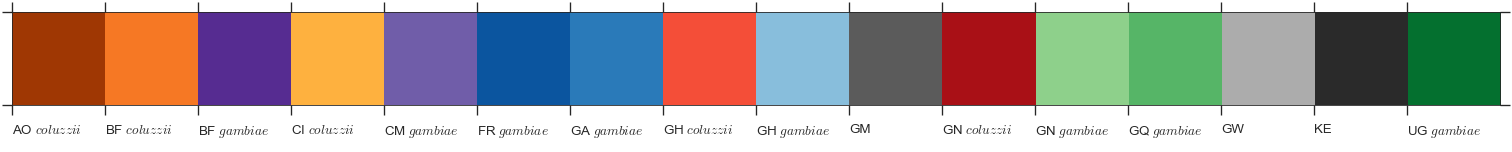

In [23]:
%run imports.ipynb
%run data_phase2_ar1.ipynb
from matplotlib import gridspec

# pi

In [5]:
winsize = '20000'
chrom = '3R'
start = 1000000
stop = 37000000
pi_fn = '/kwiat/vector/ag1000g/release/phase2.AR1/extras/diversity/pi.windows_eqaccess.h5'
pi = h5py.File(pi_fn, 'r')

In [7]:
#make boolean to compress to accessible region
pia = pi[winsize][chrom]['AOcol']['windows'][:]
geoff = (pia[:,0] > start) & (pia[:,1] < stop)
pia.shape, geoff.shape

((1621, 2), (1621,))

In [8]:
#make dict of acc region pi to boxplot
diversity = dict()

for pop in populations:
    pi_all = pi[winsize][chrom][pop]['pi'][:]
    diversity[pop] = pi_all.compress(geoff, axis=0)

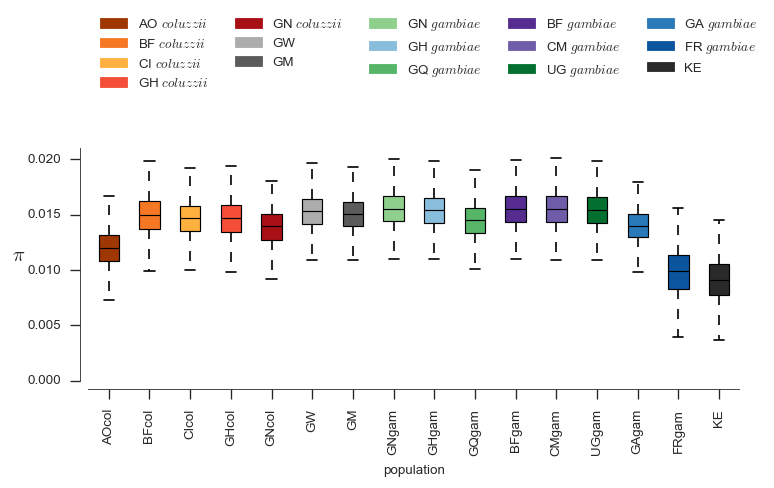

In [24]:
#plot

# Create a figure instance
fig = plt.figure(1, figsize=(7, 2.5))

# Create an axes instance
ax = fig.add_subplot(111)
sns.despine(ax=ax, offset=5)
# Create the boxplot
lw=0.7
bp = ax.boxplot(x=[diversity[pop] for pop in populations],
        labels=populations,  patch_artist=True, 
        medianprops={"color":"k", "linewidth":lw},
        whiskerprops={"color":"k"}, 
        capprops={"color":"k"},
        showfliers=False,
        flierprops={"c":"k", "markersize":0.7})

for p in populations:
    plt.xticks(rotation='vertical')

plt.ylabel(r'$\pi$', rotation = 0, fontsize=12)
plt.xlabel('population', va='top')
plt.ylim(0,0.021)

for patch, color in zip(bp['boxes'], [pop_colours[pop] for pop in populations]):
    patch.set_color('k')
    patch.set_facecolor(color)
    patch.set_linewidth(lw)


handles = [mpl.patches.Patch(color=pop_colours[pop], label=pop_labels[pop]) for pop in populations]
plt.legend(handles=handles, loc='lower left', bbox_to_anchor=(0, 1.2), ncol=5);


# SFS

In [34]:
@functools.lru_cache(maxsize=None)
def compute_sfs(chrom, start, stop, pop):
    pos = allel.SortedIndex(callset_pass[chrom]['variants/POS'])
    locr = pos.locate_range(start, stop)
    ac = allel.AlleleCountsArray(allele_counts[chrom][pop][locr])
    loca = (ac.max_allele() <= 1) & (ac.is_segregating())
    aca = ac[loca][:, :2]
    n = np.max(ac.sum(axis=1))
    s = allel.stats.sfs_folded_scaled(aca)
    return s, n

def compute_3_free_accessible_length():
    _, chrom, start, stop = region_3L_free
    is_accessible = accessibility[chrom]['is_accessible'][start-1:stop]
    l = np.count_nonzero(is_accessible)
    _, chrom, start, stop = region_3R_free
    is_accessible = accessibility[chrom]['is_accessible'][start-1:stop]
    l += np.count_nonzero(is_accessible)
    return l


populations = ['AOcol', 'BFcol', 'CIcol', 'GHcol', 'GW', 'GM', 'KE']

def plot_sfs_combined(legend=False, ax=None, lw=2):
    l = compute_3_free_accessible_length()
    if ax is None:
        fig, ax = subplots(figsize=(6,3))
    # set order for Z
    for pop in populations:
        s1, n1 = compute_sfs(*region_3R_free[1:], pop=pop)
        s2, n2 = compute_sfs(*region_3L_free[1:], pop=pop)
        assert n1 == n2
        s = s1 + s2
        s = s / l
        allel.stats.plot_sfs_folded_scaled(s, n=n1, label=pop, ax=ax, 
                                           plot_kwargs=dict(color=pop_colours[pop],
                                                            lw=lw))
    ax.set_ylabel('variant density (bp$^{-1}$)')
    ax.set_ylim(0, 0.1)
    ax.set_xlim(0, 0.5)
#     if legend:
#         ax.legend()


    handles = [mpl.patches.Patch(color=pop_colours[pop], label=pop_labels[pop]) for pop in populations]
    ax.legend(handles=handles, loc='lower left', bbox_to_anchor=(0, 1), ncol=4);

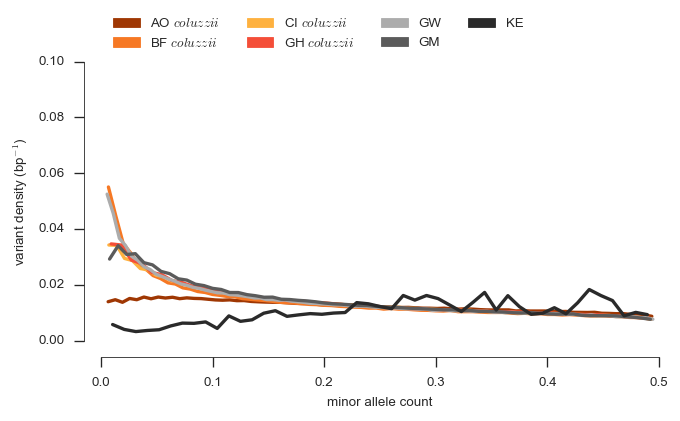

In [35]:
plot_sfs_combined(legend=True)

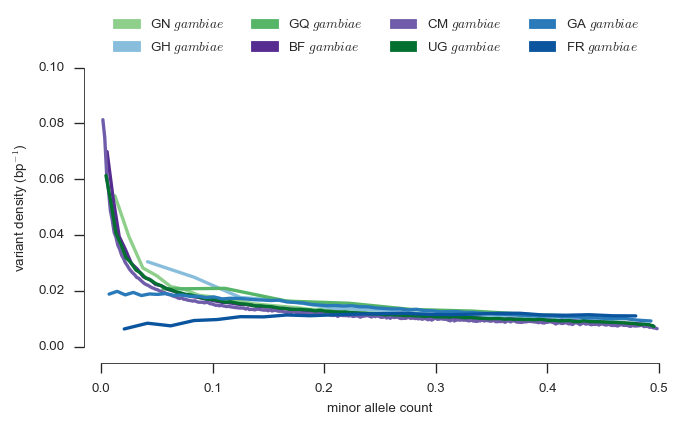

In [36]:
populations = ['GNgam', 'GHgam', 'GQgam', 'BFgam', 'CMgam', 'UGgam', 'GAgam', 'FRgam']
plot_sfs_combined(legend=True)

In [20]:
def plot_sfs_combined(legend=False, ax=None, lw=2, title=None):
    l = compute_3_free_accessible_length()
    if ax is None:
        fig, ax = subplots(figsize=(6,3))
    # set order for Z
    for pop in cake,:
        s1, n1 = compute_sfs(*region_3R_free[1:], pop=pop)
        s2, n2 = compute_sfs(*region_3L_free[1:], pop=pop)
        assert n1 == n2
        s = s1 + s2
        s = s / l
        allel.stats.plot_sfs_folded_scaled(s, n=n1, label=pop, ax=ax, 
                                           plot_kwargs=dict(color=pop_colours[pop],
                                                            lw=lw))
    ax.set_ylabel('variant density (bp$^{-1}$)')
    ax.set_title(cake)
    ax.set_ylim(0, 0.1)
    ax.set_xlim(0, 0.5)
#     if legend:
#         ax.legend()



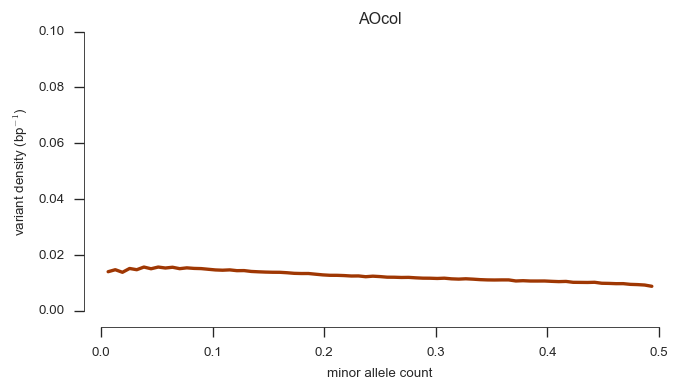

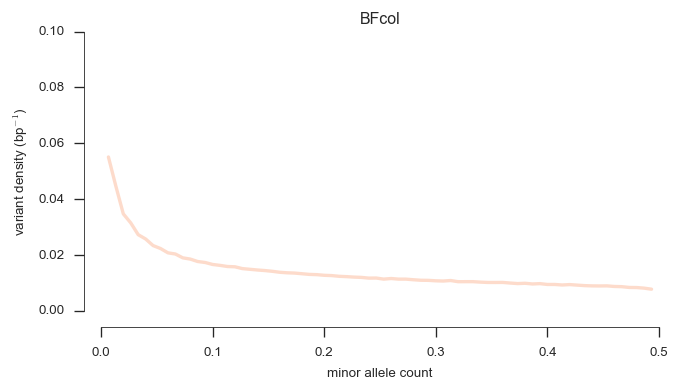

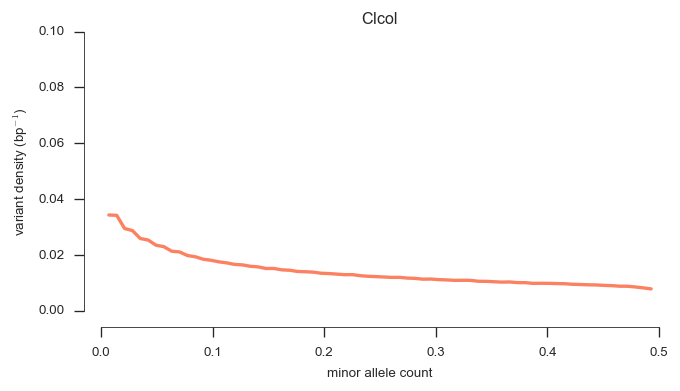

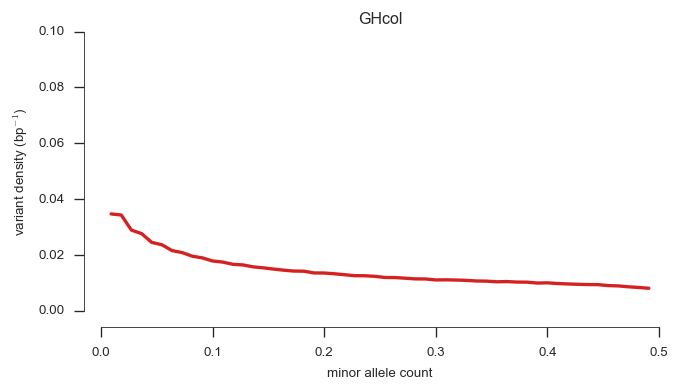

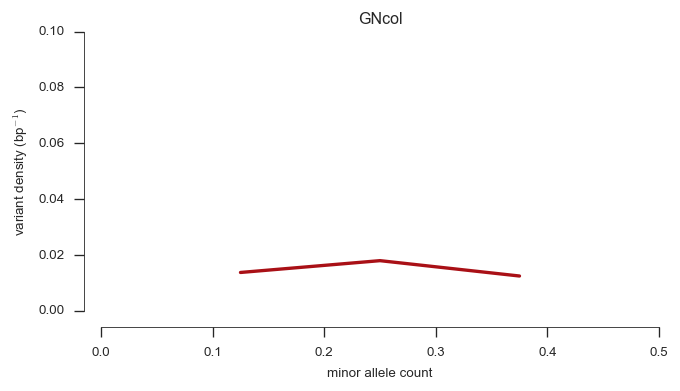

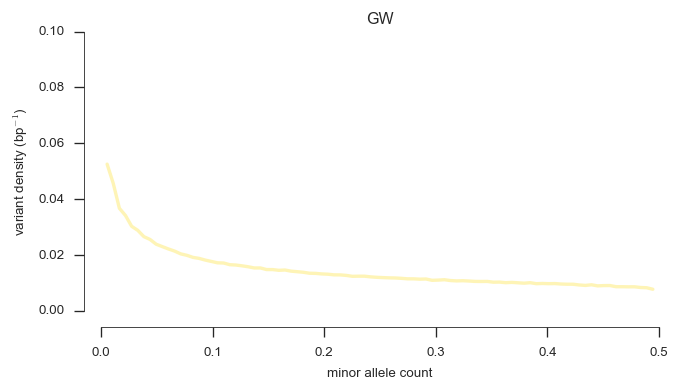

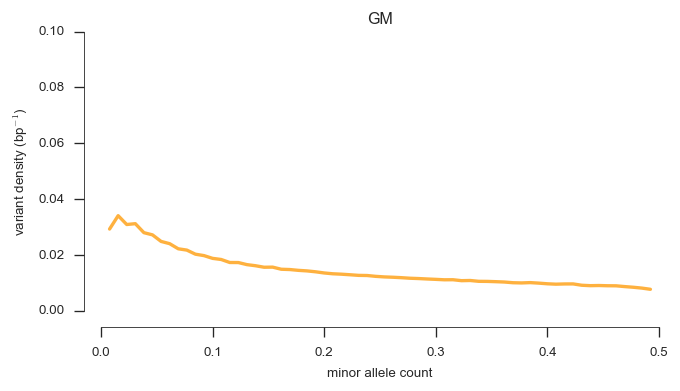

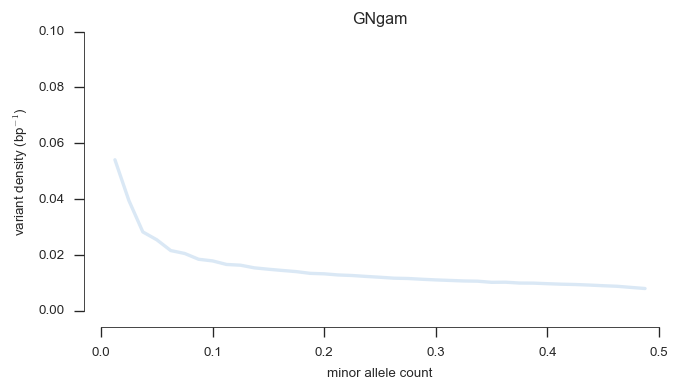

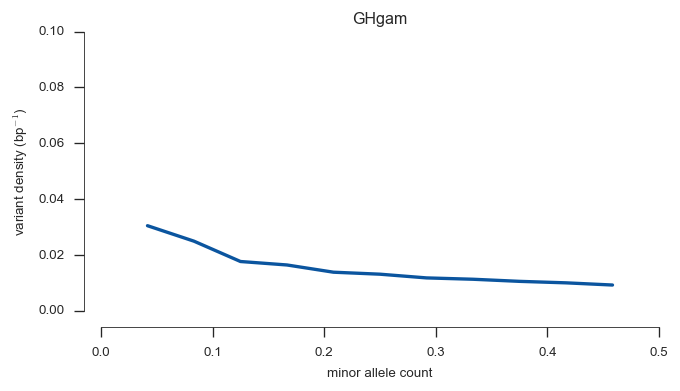

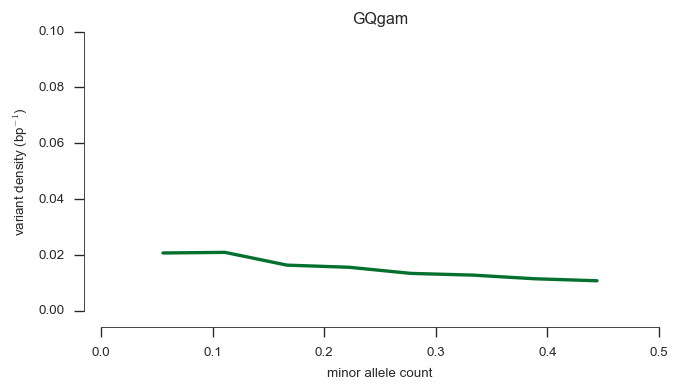

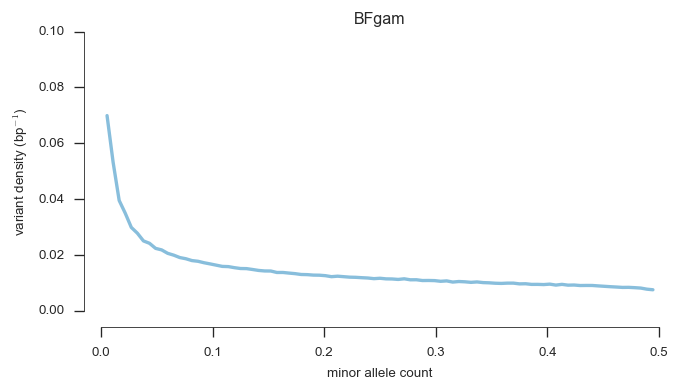

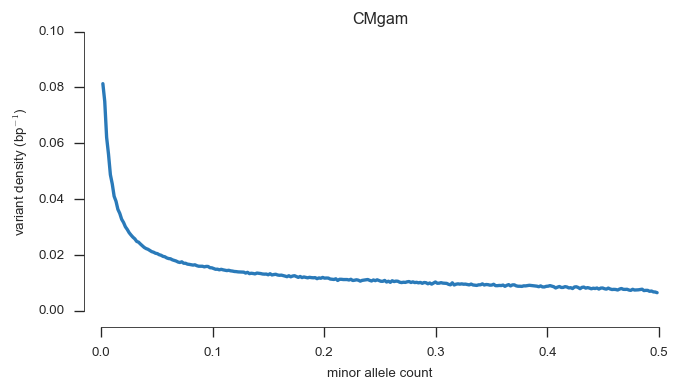

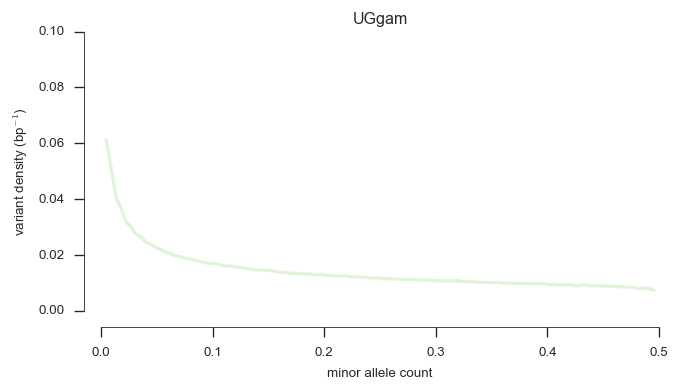

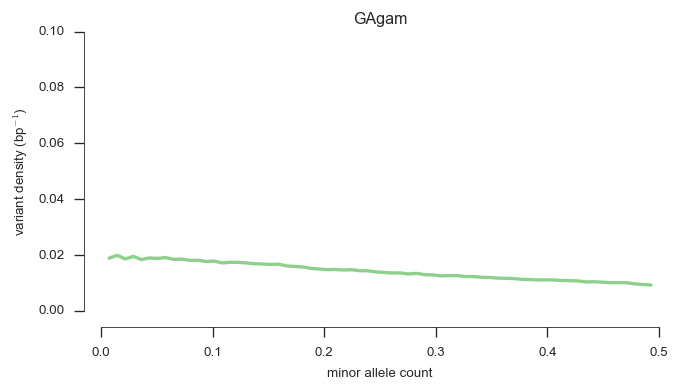

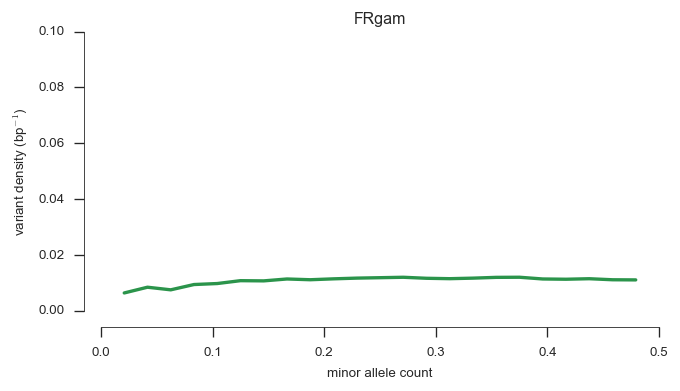

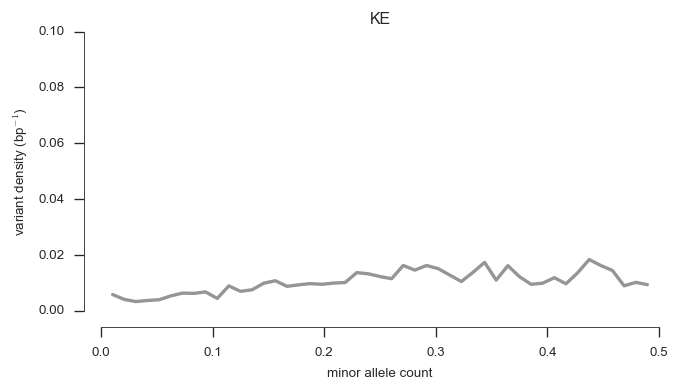

In [22]:
for cake in populations:
    plot_sfs_combined(legend=True, title=cake)